$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Ejercicio práctico | Visualización y pre-procesamiento de datos}$$

_Profesor: Moisés Meza, Jesus Alvarado_

_Alumnos: Luis Revilla, Sebastian Ríos, Emilio Ochoa_

**Dataset de referencia obtenido de:**

Rathi P. _COPD Patients Dataset_. 2021. [Online] Disponible en: https://www.kaggle.com/datasets/prakharrathi25/copd-student-dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
!gdown https://drive.google.com/uc?id=1whyeZMjzxYyoaw5SlPkn7bQ_9teH7Db4

!pip -q install lazypredict

Downloading...
From: https://drive.google.com/uc?id=1whyeZMjzxYyoaw5SlPkn7bQ_9teH7Db4
To: /content/COPD_student_dataset.csv
100% 8.08k/8.08k [00:00<00:00, 12.7MB/s]


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importamos la data y creamos nuestro nuevo DataFrame de Pandas

df = pd.read_csv('COPD_student_dataset.csv')

###COPD Patients Dataset <br>

La enfermedad pulmonar obstructiva crónica (EPOC o COPD por sus siglas en inglés) es un grupo de enfermedades pulmonares progresivas, de las cuales las más comunes son el enfisema y la bronquitis crónica. Muchas personas con EPOC padecen ambas enfermedades.

La EPOC no tratada puede provocar una progresión más rápida de las enfermedades, problemas cardiacos y un empeoramiento de las infecciones respiratorias.

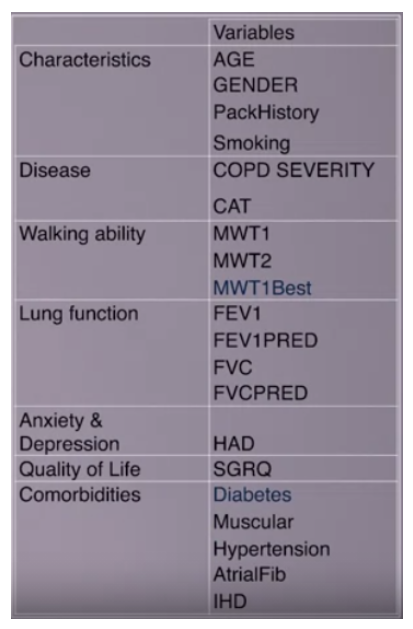

| Variable       | Descripción                                                                                       |
|----------------|---------------------------------------------------------------------------------------------------|
| AGE            | Edad del usuario                                                                                  |
| PackHistory    | Número de años que una persona ha fumado un paquete de cigarrillos                                 |
| COPDSEVERITY   | Gravedad de la enfermedad                                                                          |
| MWT1           | Distancia que el paciente camina en 6 minutos en metros (intento 1)                                 |
| MWT2           | Distancia que el paciente camina en 6 minutos en metros (intento 2)                                 |
| MWT1Best       | Distancia que el paciente camina en 6 minutos en metros (mejor intento)                             |
| FEV1           | Cantidad de aire que puede expulsar de los pulmones en un segundo en litros. Medida de la función pulmonar |
| FVC            | Volumen total de aire que un paciente puede exhalar forzosamente en una respiración                |
| SGRQ           | Índice de calidad de vida. A menor valor, mayor calidad de vida                                     |
| AGEquartiles   | Cuartiles de edad                                                                                  |
| COPD           | Estadío del EPOC                                                                                   |
| Gender         | Sexo de la persona, femenino - 0, masculino - 1                                                    |
| Smoking        | Status de fumador, no - 0, sí - 1                                                                 |
| Diabetes       | Status de diabetes, no - 0, sí - 1                                                                |
| Hypertension   | Status de hipertensión, no - 0, sí - 1                                                            |
| AtrialFib      | Sufre de Fibrilación auricular, no - 0, sí - 1                                                     |

In [ ]:
# Una vez que lo tenemos, procedamos a analizar que informacion tiene

df.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [ ]:
# Vemos que una columna no tiene nombre, viendo el data set entero entendemos que es el id
# Como ya se nos genera esa informacion repetida, podemos dropear esa columna

df.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [ ]:
# Contamos con 101 observaciones y 24 atributos

df.shape

(101, 24)

In [ ]:
# Asi tenemos el DF sin esa columna innecesaria

df = df.drop(['Unnamed: 0', 'ID'], axis =1)

In [ ]:
# Tenemos que primero analizar y entender bien la informacion
# Vemos que en el data set, tenemos que las Comorbilidades ya esta encodeado
# En orden Diabetes Muscular Hipertension AtrialFib (genera numero de 4 bits)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           101 non-null    int64  
 1   PackHistory   101 non-null    float64
 2   COPDSEVERITY  101 non-null    object 
 3   MWT1          99 non-null     float64
 4   MWT2          100 non-null    float64
 5   MWT1Best      100 non-null    float64
 6   FEV1          101 non-null    float64
 7   FEV1PRED      101 non-null    float64
 8   FVC           101 non-null    float64
 9   FVCPRED       101 non-null    int64  
 10  CAT           101 non-null    int64  
 11  HAD           101 non-null    float64
 12  SGRQ          101 non-null    float64
 13  AGEquartiles  101 non-null    int64  
 14  copd          101 non-null    int64  
 15  gender        101 non-null    int64  
 16  smoking       101 non-null    int64  
 17  Diabetes      101 non-null    int64  
 18  muscular      101 non-null    

In [ ]:
print(df['COPDSEVERITY'].unique())

['SEVERE' 'MODERATE' 'VERY SEVERE' 'MILD']


Solo la variable COPD Severity esta como objeto, debido a ser una variable categórica </br>

Sus niveles son 

1.   Mild
2.   Moderate
3.   Severe
4.   Very Severe






# Revisar si hay NaNs

In [ ]:
# Revisemos los NaNs (si es que hay)

import missingno as msno

<Axes: >

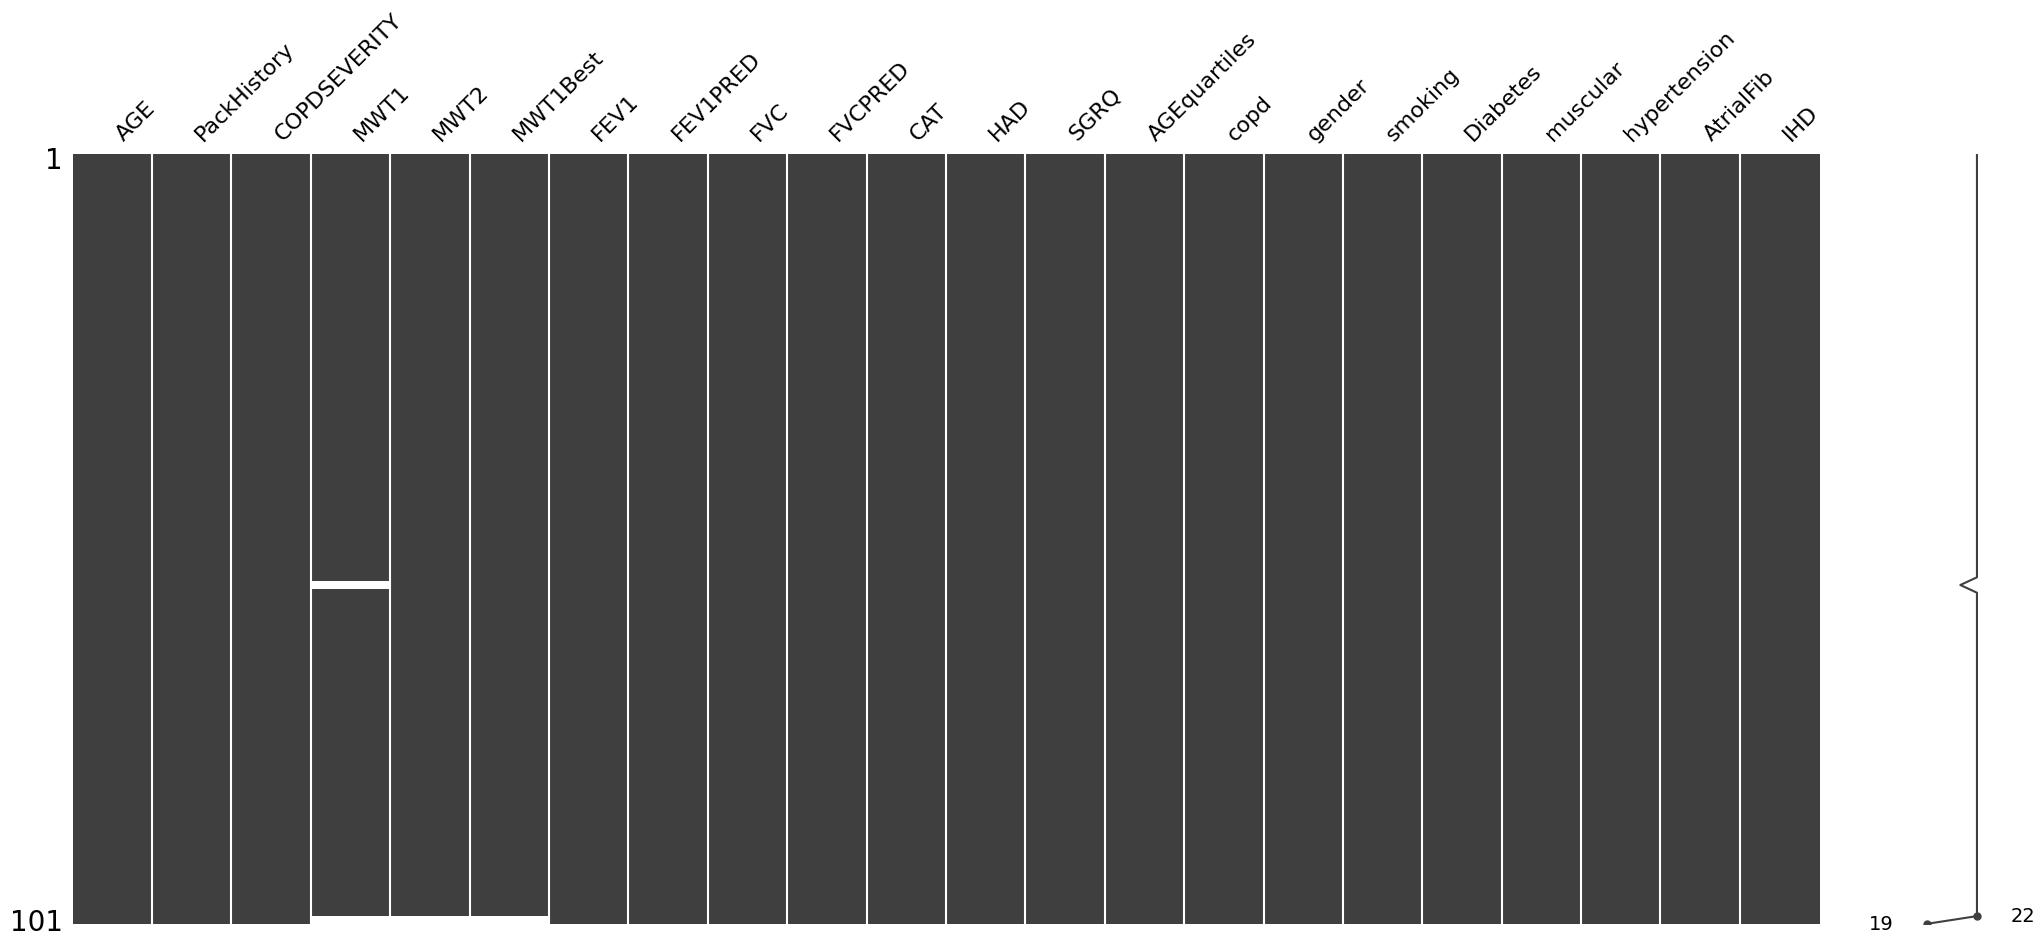

In [ ]:
msno.matrix(df)
# Tenemos 1 CERO en MWT1 en row aprox 50
# Tenemos 3 ceros en la ultima fila en los 3 MWTs

# Columnas categóricas

COPDSEVERITY

In [ ]:
# Verificamos el conteo de valores para la variable COPDSEVERITY

df[["COPDSEVERITY"]].value_counts()

COPDSEVERITY
MODERATE        43
SEVERE          27
MILD            23
VERY SEVERE      8
dtype: int64

In [ ]:
# Entonces ahora lo categorizamos
from pandas.api.types import CategoricalDtype

In [ ]:
# Asi ya no sera un dtype sino una variable categorica
severity_type = CategoricalDtype(['MILD','MODERATE','SEVERE','VERY SEVERE'], ordered = True)

df['COPDSEVERITY'] = df['COPDSEVERITY'].astype(severity_type)

AGEquartiles

In [ ]:
# Verificamos el conteo de valores para la variable AGEquartiles

df[["AGEquartiles"]].value_counts()

AGEquartiles
3               28
1               26
2               24
4               23
dtype: int64

In [ ]:
df["AGEquartiles"] = df["AGEquartiles"].replace({1: 0, 2: 1, 3: 2, 4: 3})

COPD

In [ ]:
# Tenemos una variable denominada como COPD, verificaremos si es la misma que 
# COPDSEVERITY

copd_counts = df[["copd"]].value_counts().reset_index(name='copd_counts')
severity_counts = df[["COPDSEVERITY"]].value_counts().reset_index(name='severity_counts')
counts_df = pd.concat([copd_counts, severity_counts], axis=1)

print(counts_df)

   copd  copd_counts COPDSEVERITY  severity_counts
0     2           43     MODERATE               43
1     3           27       SEVERE               27
2     1           23         MILD               23
3     4            8  VERY SEVERE                8


Gender

In [ ]:
df[["gender"]].value_counts()

gender
1         65
0         36
dtype: int64

Smoking

In [ ]:
df[["smoking"]].value_counts()

smoking
2          85
1          16
dtype: int64

In [ ]:
df["smoking"] = df["smoking"].replace({1: 1, 2: 0})

Diabetes

In [ ]:
df[["Diabetes"]].value_counts()

Diabetes
0           80
1           21
dtype: int64

Muscular

In [ ]:
df[["muscular"]].value_counts()

muscular
0           82
1           19
dtype: int64

Hypertension

In [ ]:
df[["hypertension"]].value_counts()

hypertension
0               89
1               12
dtype: int64

Atrial Fibrillation

In [ ]:
df[["AtrialFib"]].value_counts()

AtrialFib
0            81
1            20
dtype: int64

IHD

In [ ]:
df[["IHD"]].value_counts()

IHD
0      92
1       9
dtype: int64

#Data Imputation

In [ ]:
# Hacemos data imputation con el promedio de los valores de cada atributo

df[["MWT1"]] = df[["MWT1"]].fillna(df[["MWT1"]].mean())
df[["MWT2"]] = df[["MWT2"]].fillna(df[["MWT2"]].mean())
df[["MWT1Best"]] = df[["MWT1Best"]].fillna(df[["MWT1Best"]].mean())

<Axes: >

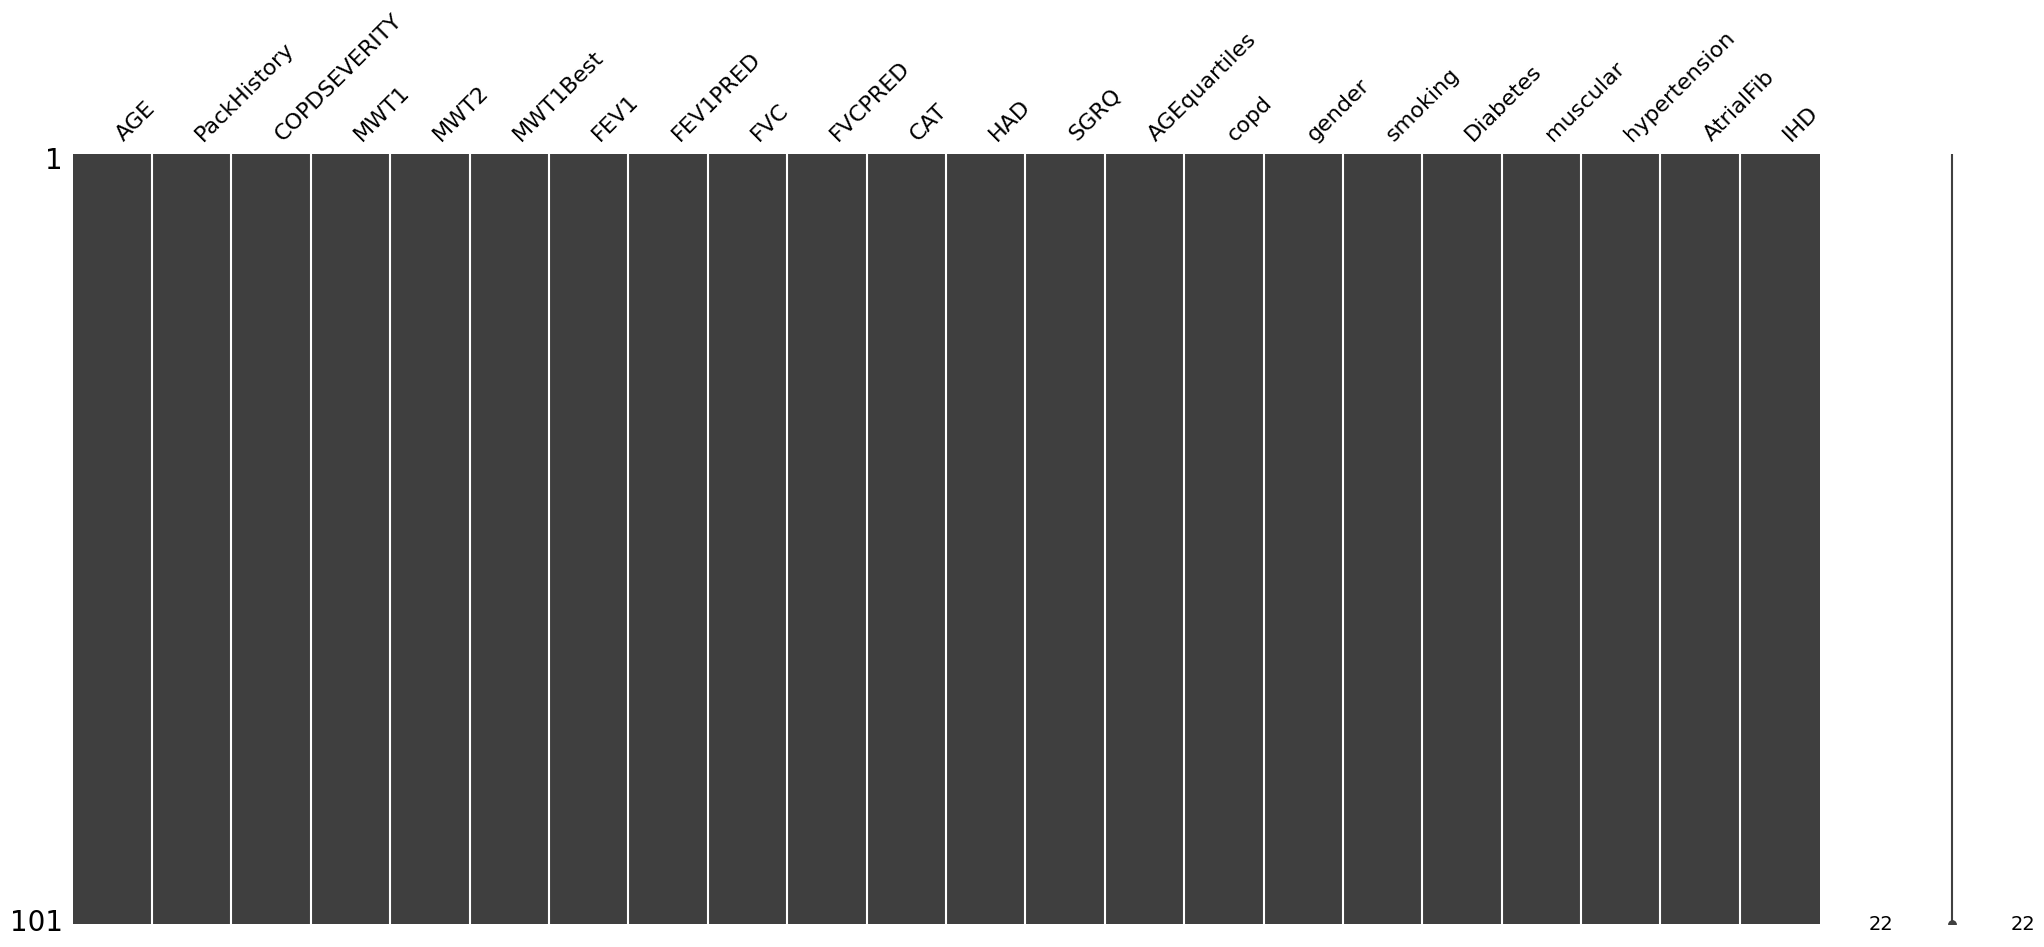

In [ ]:
# Podemos correr esta linea para ver que ahora el mapa no tiene lineas blancas 
msno.matrix(df)

# Exploratory Data Analysis

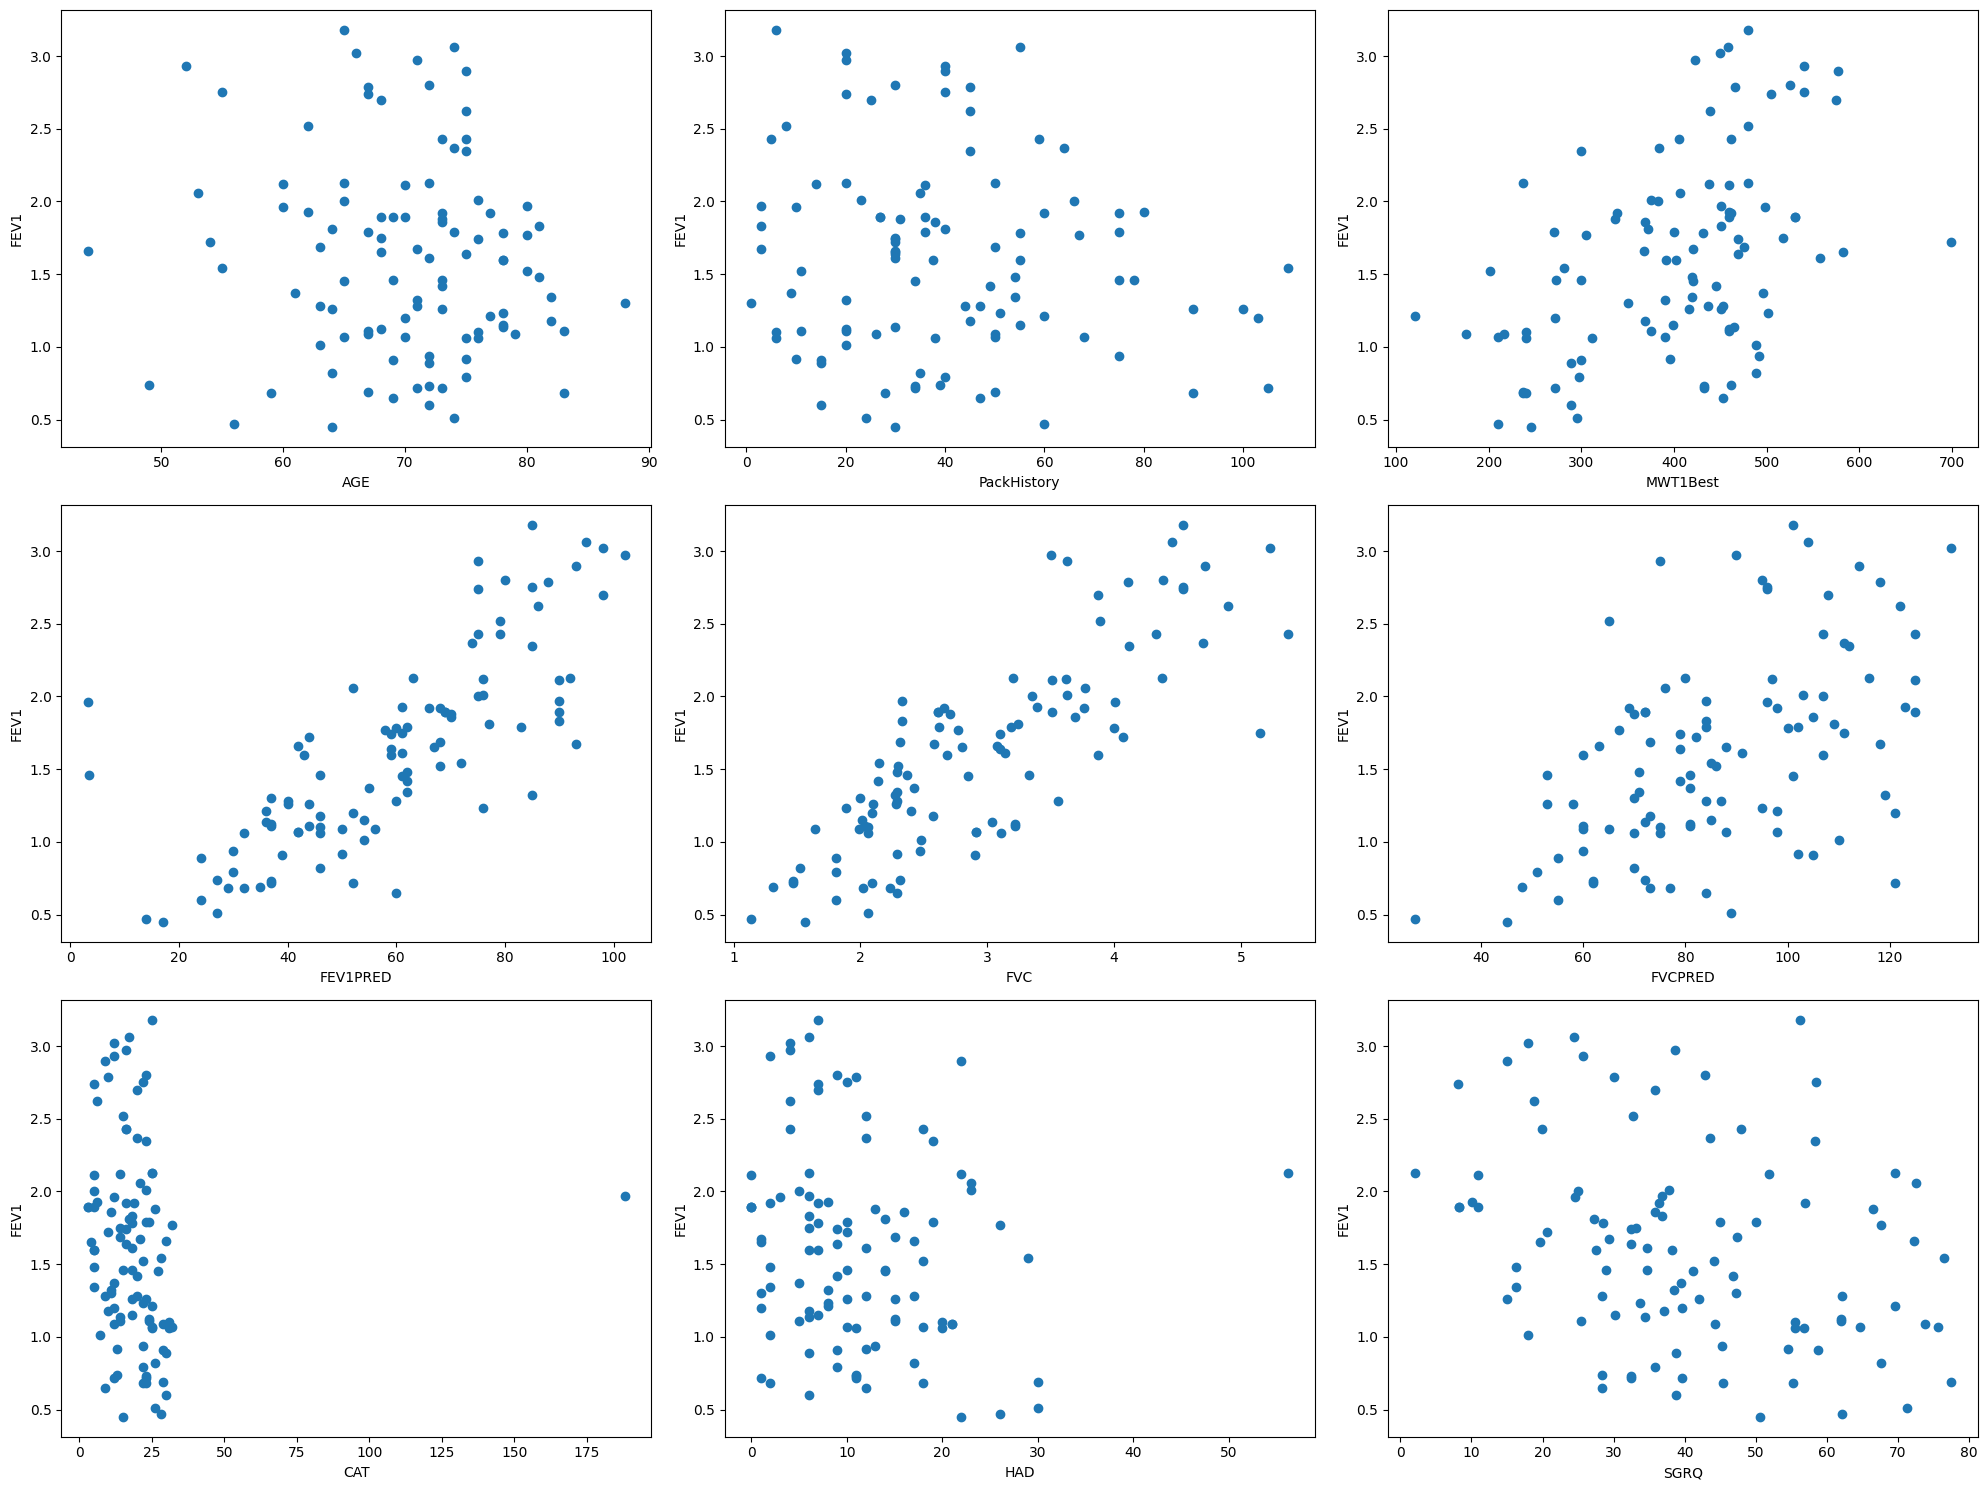

In [ ]:
# Hacemos un gráfico de scatterplot para cada una de las variables respecto al target

# Variables a graficar
variables = ['AGE', 'PackHistory', 'MWT1Best', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 
             'HAD', 'SGRQ']

# Graficar cajas y bigotes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for i, variable in enumerate(variables):
    ax = axes[i//3, i%3]
    ax.scatter(df[variable], df['FEV1'])
    ax.set_xlabel(variable)
    ax.set_ylabel('FEV1')
    
plt.tight_layout()
plt.show()

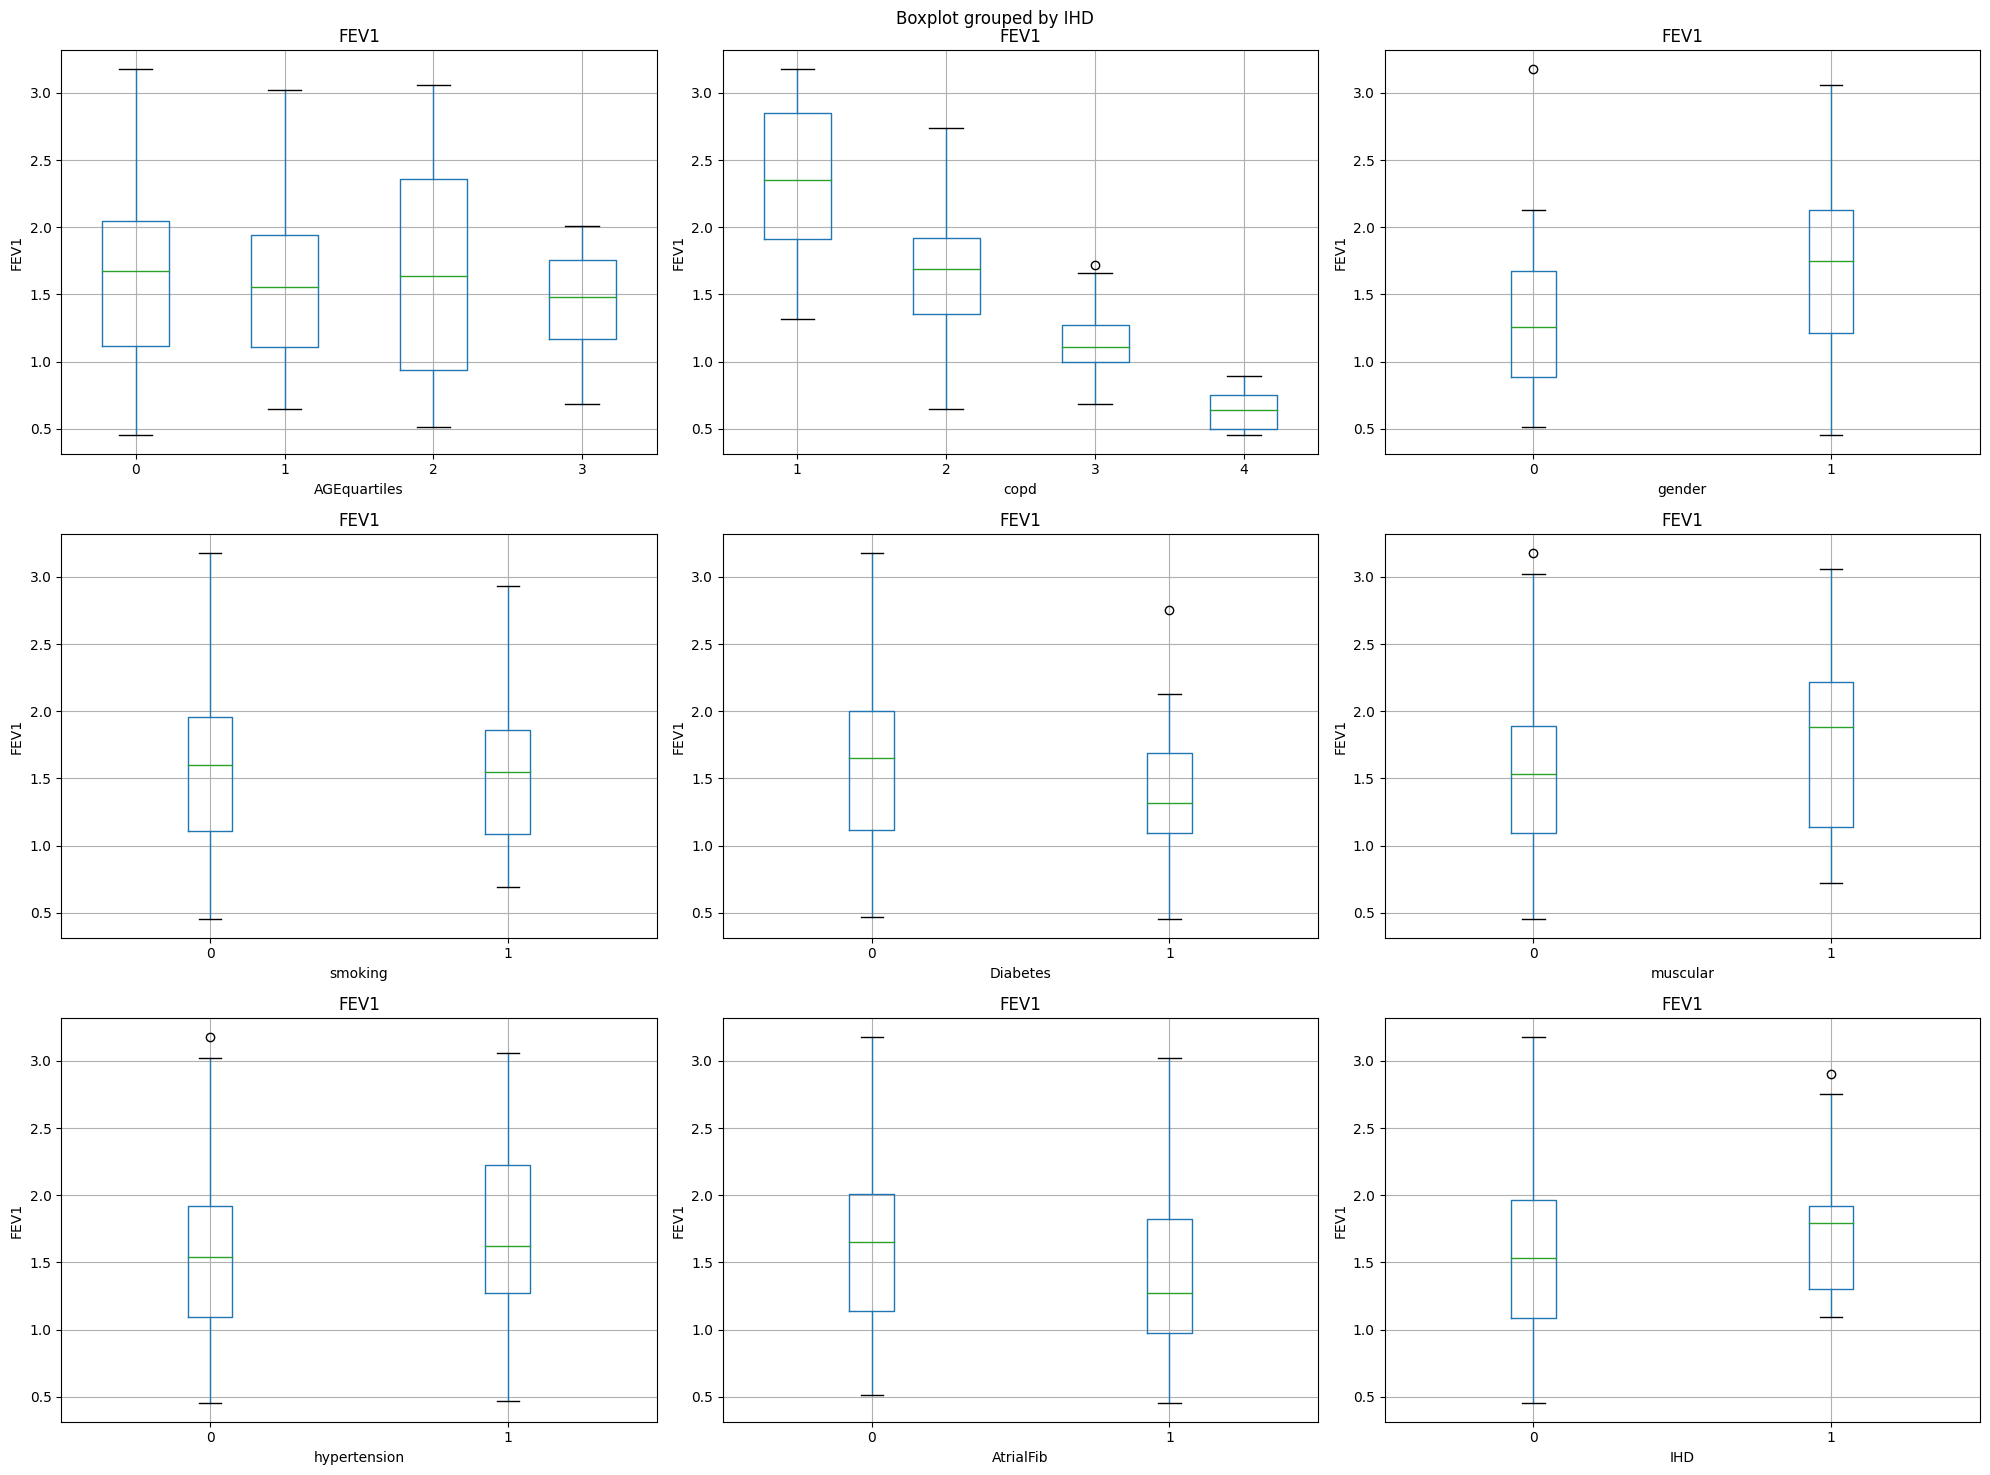

In [ ]:
# Hacemos un boxplot para cada una de las variables respecto al target

# Variables a graficar
variables = ['AGEquartiles', 'copd', 'gender', 'smoking', 
             'Diabetes', 'muscular', 'hypertension', 'AtrialFib', 'IHD']

# Graficar cajas y bigotes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for i, variable in enumerate(variables):
    ax = axes[i//3, i%3]
    df.boxplot(column='FEV1', by=variable, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('FEV1')
    
plt.tight_layout()
plt.show()

# Selección de variable target

En este caso, queremos analizar una medida de la funcionalidad del pulmón; ‘FEV1’, que representa la cantidad de aire que una persona puede exhalar en un segundo, los valores más altos indican una mejor función pulmonar. </br>

In [ ]:
# Ahora que limpiamos los datos nulos 
# Debemos escoger que informacion sera el training set
 #Y cual sera el training set para testear
X = df.drop(['FEV1', 'MWT1', 'MWT2', 'copd'], axis = 1)
y = df['FEV1']

# Scaling

Variables numéricas continuas

In [ ]:
# Utilizamos el RobustScaler visto en clase

from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler_robust = RobustScaler()
scaler_robust.fit(X[['AGE', 'PackHistory', 'MWT1Best', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 
             'HAD', 'SGRQ']])

RobustScaler()

In [ ]:
# Escalamos las variables numéricas

X_numeric = X[['AGE', 'PackHistory', 'MWT1Best', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 
               'HAD', 'SGRQ']]
X_numeric_scaled = scaler_robust.transform(X_numeric)
X_numeric_scaled

array([[ 6.00000000e-01,  7.05882353e-01, -1.87500000e+00,
        -7.27272727e-01, -2.72058824e-01,  4.37500000e-01,
         5.83333333e-01, -2.22222222e-01,  1.16853095e+00],
       [ 8.00000000e-01,  4.11764706e-01, -1.52500000e+00,
        -1.21212121e-01, -8.30882353e-01, -5.93750000e-01,
        -5.00000000e-01,  1.22222222e+00,  2.24832215e-01],
       [ 9.00000000e-01, -7.35294118e-01, -1.36875000e+00,
         2.42424242e-01, -3.45588235e-01,  6.25000000e-02,
         3.33333333e-01,  8.88888889e-01,  2.19239374e-01],
       [-1.50000000e+00,  7.05882353e-01, -1.31250000e+00,
        -1.39393939e+00, -1.19852941e+00, -1.78125000e+00,
         8.33333333e-01,  1.77777778e+00,  8.88516033e-01],
       [-6.00000000e-01,  9.41176471e-01, -1.31250000e+00,
        -5.45454545e-01,  1.02941176e-01,  4.37500000e-01,
         1.16666667e+00,  8.88888889e-01,  1.39261745e+00],
       [-4.00000000e-01, -2.94117647e-01, -1.27500000e+00,
        -3.03030303e-01, -5.73529412e-01, -7.500000

Variables categóricas (COPDSEVERITY)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder 

In [ ]:
# Agregamos niveles para cada valor en COPDSEVERITY

maplist = [{'col': 'COPDSEVERITY', 'mapping': {'MILD': 0, 'MODERATE': 1, 'SEVERE': 2, 
                                               'VERY SEVERE': 3}}]

In [ ]:
ord_enc_copd = OrdinalEncoder(mapping=maplist)
ord_enc_copd = ord_enc_copd.fit_transform(X[["COPDSEVERITY"]])

In [ ]:
ord_enc_copd

,COPDSEVERITY
0,2
1,1
2,1
3,3
4,2
...,...
96,0
97,0
98,1
99,2


Unimos la tabla final con todos los features

In [ ]:
# Debemos tener en cuenta la lista de nombres para armar el dataframe final al
# juntar todos los escalamientos

X.columns

Index(['AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1Best', 'FEV1PRED', 'FVC',
       'FVCPRED', 'CAT', 'HAD', 'SGRQ', 'AGEquartiles', 'gender', 'smoking',
       'Diabetes', 'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [ ]:
X_scaled_aux = np.hstack([X_numeric_scaled, ord_enc_copd.values.reshape(-1, 1)])
X_scaled_df = pd.DataFrame(X_scaled_aux, columns=X_numeric.columns.tolist() + ['COPDSEVERITY'])


In [ ]:
X_scaled_df

,AGE,PackHistory,MWT1Best,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,COPDSEVERITY
0,0.6,0.705882,-1.875000,-0.727273,-0.272059,0.43750,0.583333,-0.222222,1.168531,2.0
1,0.8,0.411765,-1.525000,-0.121212,-0.830882,-0.59375,-0.500000,1.222222,0.224832,1.0
2,0.9,-0.735294,-1.368750,0.242424,-0.345588,0.06250,0.333333,0.888889,0.219239,1.0
3,-1.5,0.705882,-1.312500,-1.393939,-1.198529,-1.78125,0.833333,1.777778,0.888516,3.0
4,-0.6,0.941176,-1.312500,-0.545455,0.102941,0.43750,1.166667,0.888889,1.392617,2.0
...,...,...,...,...,...,...,...,...,...,...
96,-0.3,-0.323529,0.968750,1.151515,0.808824,0.75000,0.166667,-0.333333,-0.088367,0.0
97,0.4,0.117647,0.981250,1.000000,1.433824,0.93750,-0.750000,1.333333,-0.863535,0.0
98,-0.3,-0.176471,1.012500,0.212121,0.022059,0.12500,-1.166667,-1.000000,-0.690157,1.0
99,-1.7,-0.176471,1.743750,-0.484848,0.955882,-0.06250,-0.666667,0.000000,-0.658464,2.0


In [ ]:
# Concatenamos y agregamos nombres a cada atributo escalado

nombres = ['AGE', 'PackHistory', 'MWT1Best', 'FEV1PRED', 'FVC',
       'FVCPRED', 'CAT', 'HAD', 'SGRQ','COPDSEVERITY', 'AGEquartiles', 'gender', 'smoking',
       'Diabetes', 'muscular', 'hypertension', 'AtrialFib', 'IHD']
X_categorical = df[variables]
X_scaled_df = pd.DataFrame(np.concatenate([X_numeric_scaled, X_categorical], axis=1), columns=nombres)

In [ ]:
X_scaled_df

,AGE,PackHistory,MWT1Best,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,COPDSEVERITY,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,0.6,0.705882,-1.875000,-0.727273,-0.272059,0.43750,0.583333,-0.222222,1.168531,3.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.8,0.411765,-1.525000,-0.121212,-0.830882,-0.59375,-0.500000,1.222222,0.224832,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.9,-0.735294,-1.368750,0.242424,-0.345588,0.06250,0.333333,0.888889,0.219239,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.5,0.705882,-1.312500,-1.393939,-1.198529,-1.78125,0.833333,1.777778,0.888516,0.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.6,0.941176,-1.312500,-0.545455,0.102941,0.43750,1.166667,0.888889,1.392617,0.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.3,-0.323529,0.968750,1.151515,0.808824,0.75000,0.166667,-0.333333,-0.088367,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
97,0.4,0.117647,0.981250,1.000000,1.433824,0.93750,-0.750000,1.333333,-0.863535,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
98,-0.3,-0.176471,1.012500,0.212121,0.022059,0.12500,-1.166667,-1.000000,-0.690157,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99,-1.7,-0.176471,1.743750,-0.484848,0.955882,-0.06250,-0.666667,0.000000,-0.658464,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Dividimos train y test

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,y, random_state=47, test_size = 0.33)

In [ ]:
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lmodel.predict(X_test)

In [ ]:
# Verificamos el Score de R2, el cual nos explica la capacidad del modelo de
# representar la variabilidad en los datos, mientras más, mejor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(y_test, y_pred)

0.7746466252052002

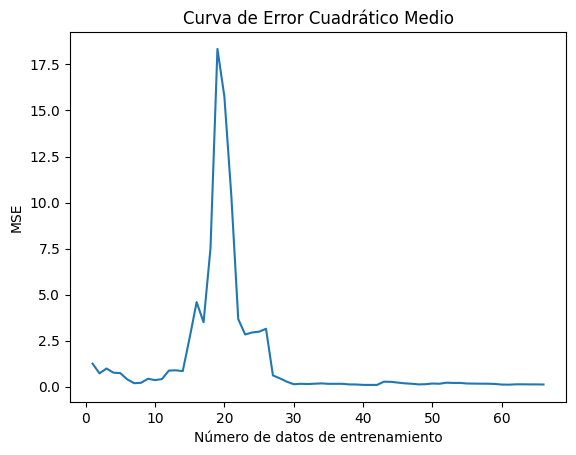

In [ ]:
# Una forma de ver el performance del modelo es calculando el Mean Squared Error

mse_values = []

for i in range(1, len(X_train)):
    model = LinearRegression()
    model.fit(X_train[:i], y_train[:i])
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(np.arange(1, len(X_train)), mse_values)
plt.title('Curva de Error Cuadrático Medio')
plt.xlabel('Número de datos de entrenamiento')
plt.ylabel('MSE')
plt.show()